In [22]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

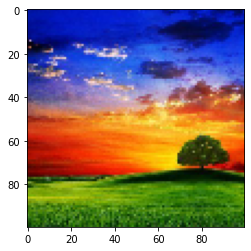

In [23]:
inputImg = plt.imread('CroppedResizedImage.png')[:,:,:3]
plt.imshow(inputImg)
plt.show()

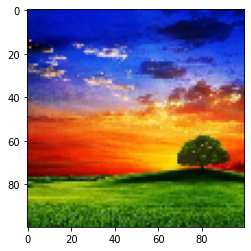

In [24]:
RGBIMag = inputImg.copy()
RGBIMag = RGBIMag*255.0
RGBIMag = RGBIMag.astype(np.uint8)

plt.imshow(RGBIMag)
plt.show()

In [25]:
def RGBtoYCrCb(Rin, Gin, Bin):
    Yout = 0.299*Rin + 0.587*Gin + 0.114*Bin
    Cr = 0.499*Rin - 0.418*Gin - 0.0813*Bin + 128
    Cb = -0.169*Rin - 0.331*Gin + 0.499*Bin + 128
    return {'Y' : Yout, 'Cr' : Cr, 'Cb' : Cb}

In [26]:
def YCrCbtoRGB(Yin, Cr, Cb):
    Rout = Yin + (1.402*(Cr-128))
    Gout = Yin - (0.344*(Cb-128)) - (0.714*(Cr-128))
    Bout = Yin + (1.772*(Cb-128))
    if Rout > 255:
        Rout = 255
    elif Rout < 0:
        Rout = 0
    else:
        Rout = Rout
    
    if Gout > 255:
        Gout = 255
    elif Gout < 0:
        Gout = 0
    else:
        Gout = Gout
    
    if Bout > 255:
        Bout = 255
    elif Bout < 0:
        Bout = 0
    else:
        Bout = Bout
    return {'R' : Rout, 'G' : Gout, 'B' : Bout}

In [27]:
YCrCbfromFormula = np.zeros((RGBIMag.shape))
YfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
CrfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
CbfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))

for i in range(RGBIMag.shape[0]):
    for j in range(RGBIMag.shape[1]):
        YCrCbfrom444 = RGBtoYCrCb(RGBIMag[i,j,0], RGBIMag[i,j,1], RGBIMag[i,j,2])
        YfromFormula[i,j] = YCrCbfrom444['Y']
        CrfromFormula[i,j] = YCrCbfrom444['Cr']
        CbfromFormula[i,j] = YCrCbfrom444['Cb']
        YCrCbfromFormula[i,j, :] = np.asarray([YCrCbfrom444['Y'], YCrCbfrom444['Cr'], YCrCbfrom444['Cb']])

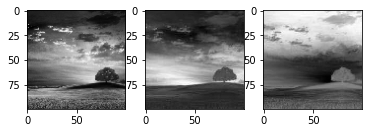

In [28]:
fig, axs = plt.subplots(1,3)

axs[0].imshow(YfromFormula, cmap='gray')
axs[1].imshow(CrfromFormula, cmap='gray')
axs[2].imshow(CbfromFormula, cmap='gray')

plt.show()

In [29]:
YfromFormula.max(), CrfromFormula.max(), CbfromFormula.max(),  YCrCbfromFormula.max()

(239.045, 237.62040000000002, 226.015, 239.045)

In [30]:
YfromFormula.min(), CrfromFormula.min(), CbfromFormula.min(),  YCrCbfromFormula.min()

(4.235, 77.3861, 16.562999999999988, 4.235)

In [31]:
RGBfromFormula = np.zeros((RGBIMag.shape))
RfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
GfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
BfromFormula = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))

for i in range(RGBIMag.shape[0]):
    for j in range(RGBIMag.shape[1]):
        RGBfrom = YCrCbtoRGB(YCrCbfromFormula[i,j, 0], YCrCbfromFormula[i,j, 1], YCrCbfromFormula[i,j, 2])
        RfromFormula[i,j] = RGBfrom['R']
        GfromFormula[i,j] = RGBfrom['G']
        BfromFormula[i,j] = RGBfrom['B']

In [32]:
RGBfromFormula[:,:, 0] = RfromFormula
RGBfromFormula[:,:, 1] = GfromFormula
RGBfromFormula[:,:, 2] = BfromFormula

RGBfromFormula =RGBfromFormula

In [33]:
RfromFormula.max(), RfromFormula.min(), GfromFormula.max(), GfromFormula.min(), BfromFormula.max(), BfromFormula.min()

(254.865073,
 0.0015208000000050959,
 244.1160702,
 0.07009219999999416,
 254.56171200000003,
 0.0)

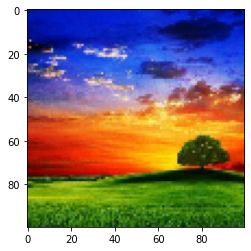

In [34]:
plt.imshow(RGBfromFormula/255.0)
plt.show()

0.46182000000004564 0.0 0


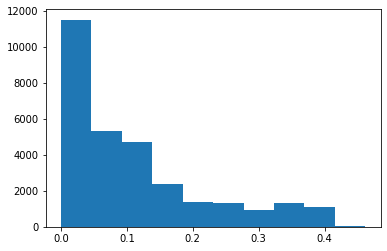

In [35]:
er = abs(RGBfromFormula - RGBIMag)
print(er.max(), er.min(), np.sum(er>100))
plt.hist(er.flatten())
plt.show()

In [50]:
iY = YfromFormula
iCr = cv2.resize(CrfromFormula, (CrfromFormula.shape[0]//2, CrfromFormula.shape[0]//2), interpolation=cv2.INTER_AREA)
iCb = cv2.resize(CbfromFormula, (CbfromFormula.shape[0]//2, CbfromFormula.shape[0]//2), interpolation=cv2.INTER_AREA)

In [51]:
R = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
G = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))
B = np.zeros((RGBIMag.shape[0], RGBIMag.shape[1]))

indUV, jndUV = 0,0
for indY in range(RGBIMag.shape[0]):
# for indY in range(6):
    indUV = indY>>1
    for jndY in range(RGBIMag.shape[1]):
        jndUV = jndY>>1


        # print(indY, jndY, indUV, jndUV)
        # print(iY[indY,jndY], iU[indUV,jndUV], iV[indUV,jndUV])
        rgb2 = YCrCbtoRGB(iY[indY,jndY], iCr[indUV,jndUV], iCb[indUV,jndUV])
        R[indY, jndY], G[indY, jndY], B[indY, jndY] = rgb2['R'], rgb2['G'], rgb2['B']   
    

255.0 0.0
81.237222 288


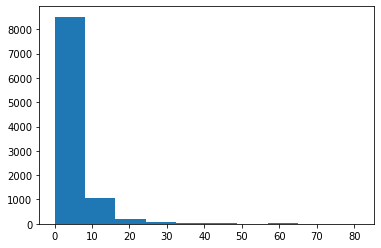

In [52]:
errR = abs(R.astype(float) - RGBIMag[:,:,0].astype(float))
print(R.max(), R.min())
print(errR.max(), np.sum(errR>20))
plt.hist(errR.flatten())
plt.show()

239.12020389999998 0.0
35.958698600000005 61


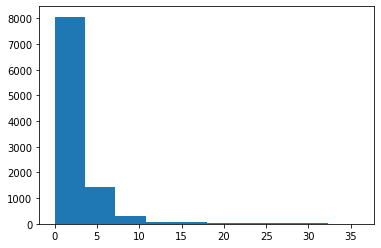

In [53]:
errG = abs(G.astype(float) - RGBIMag[:,:,1].astype(float))
print(G.max(), G.min())
print(errG.max(), np.sum(errG>20))
plt.hist(errG.flatten())
plt.show()

255.0 0.0
209.79453600000005 9162


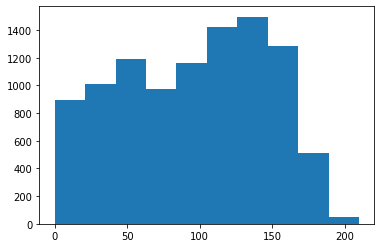

In [54]:
errB = abs(B.astype(float) - RGBIMag[:,:,1].astype(float))
print(B.max(), B.min())
print(errB.max(), np.sum(errB>20))
plt.hist(errB.flatten())
plt.show()

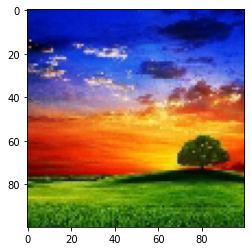

In [55]:
sofwareOutput = np.zeros((RGBIMag.shape))
sofwareOutput[:,:,0] = R
sofwareOutput[:,:,1] = G
sofwareOutput[:,:,2] = B

plt.imshow(sofwareOutput/255)
plt.show()

91.27191899999997 995


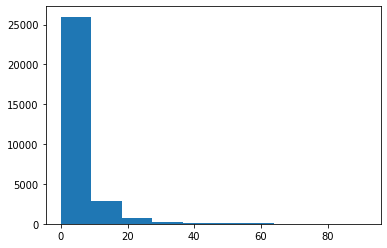

In [56]:
err = abs(sofwareOutput.astype(float) - RGBIMag.astype(float))
print(err.max(), np.sum(err>20))
plt.hist(err.flatten())
plt.show()